# In this notebook, my goal it to explore the key feature of heart disease, "Age".

In [2]:
import pandas as pd
df = pd.read_csv("/home/yair/Documents/Bar-Ilan/third-year/semester2/Statistical-Theory/heart_disease_dataset.csv")
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,Nothing,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,Nothing,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,Nothing,6,No,Yes,No,2,183,Yes,Asymptomatic,0


## I will start with some graphs, to get some information of how things are.
### I will start with the min and max for age.

In [3]:
# Calculate min and max for Age
age_min = df['Age'].min()
age_max = df['Age'].max()

print(f"Age - Min: {age_min}, Max: {age_max}")

Age - Min: 25, Max: 79


### And now let's look at the min and max, but separting people who have heard disease from people who don't.

In [4]:
# Separate data by heart disease status
heart_disease_positive = df[df['Heart Disease'] == 1]
heart_disease_negative = df[df['Heart Disease'] == 0]

# Calculate min and max for Age and Cholesterol for both groups
# For those with heart disease
age_min_hd = heart_disease_positive['Age'].min()
age_max_hd = heart_disease_positive['Age'].max()


# For those without heart disease
age_min_no_hd = heart_disease_negative['Age'].min()
age_max_no_hd = heart_disease_negative['Age'].max()


print("For people with heart disease:")
print(f"Age - Min: {age_min_hd}, Max: {age_max_hd}")

print("\nFor people without heart disease:")
print(f"Age - Min: {age_min_no_hd}, Max: {age_max_no_hd}")

For people with heart disease:
Age - Min: 51, Max: 79

For people without heart disease:
Age - Min: 25, Max: 79


In [5]:
import pandas as pd

# Assuming your dataset is in a DataFrame called 'df' and it has an 'age' column

# Define the age bins (0-10, 11-20, ..., 81-90)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

# Create age group labels
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

# Create a new column 'age_group' that categorizes each age into the defined bins
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count how many people are in each age group
age_group_counts = df['age_group'].value_counts().sort_index()

# Display the results
print(age_group_counts)


age_group
0-10       0
11-20      0
21-30     92
31-40    165
41-50    196
51-60    181
61-70    184
71-80    182
81-90      0
Name: count, dtype: int64


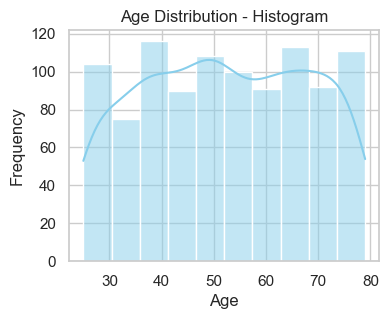

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style of the plot
sns.set(style="whitegrid")

# Plot histogram of the Age feature
plt.figure(figsize=(4, 3))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution - Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the plot
plt.show()


### Let's plot a plotbox for age.

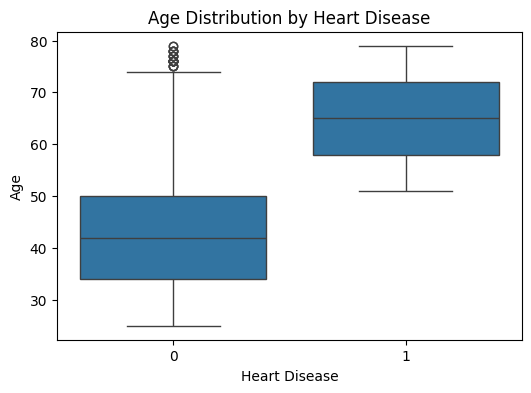

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for Age
plt.figure(figsize=(6, 4))
sns.boxplot(x='Heart Disease', y='Age', data=df)
plt.title('Age Distribution by Heart Disease')
plt.show()

### For a more detailed graph, I will plot a voilen plot.

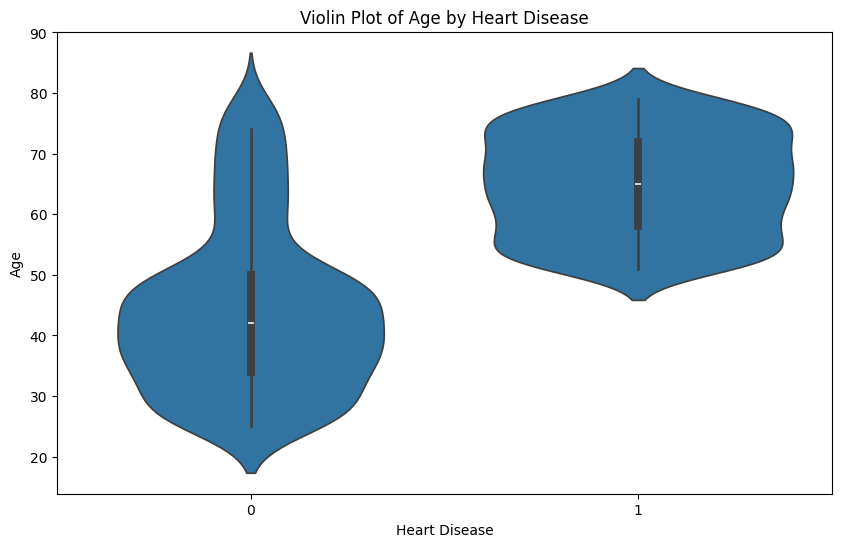

In [7]:
# Violin plot for Age
plt.figure(figsize=(10, 6))
sns.violinplot(x='Heart Disease', y='Age', data=df)
plt.title('Violin Plot of Age by Heart Disease')
plt.show()

### Looking at the voilen graph, we can see a tha from about 50, people chances of getting a heart disease spikes, and there isn't a single person with a heart disease below 40. let's focus on people above 50, and try to see if the chances rises up again using some statiscal tests.

### We'll start by preparing the data:

In [8]:
# Define the new age groups
group_50_65 = df[(df['Age'] >= 50) & (df['Age'] < 65)]
group_65_80 = df[(df['Age'] >= 65) & (df['Age'] < 80)]

# Heart disease counts in each group
count_50_65 = group_50_65['Heart Disease'].value_counts()
count_65_80 = group_65_80['Heart Disease'].value_counts()

print("50-65 years old:", count_50_65)
print("65-80 years old:", count_65_80)


50-65 years old: Heart Disease
1    190
0     84
Name: count, dtype: int64
65-80 years old: Heart Disease
1    202
0     71
Name: count, dtype: int64


### Now we'll run the test:

In [9]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

# Get the number of heart disease cases and total observations in both groups
heart_disease_50_65 = count_50_65.get(1, 0)  # Cases of heart disease (1)
n1 = group_50_65.shape[0]  # Total number of people in the 50-65 group

heart_disease_65_80 = count_65_80.get(1, 0)  # Cases of heart disease (1)
n2 = group_65_80.shape[0]  # Total number of people in the 65-80 group

# Perform two-proportion z-test
count = np.array([heart_disease_50_65, heart_disease_65_80])
nobs = np.array([n1, n2])
stat, pval = proportions_ztest(count, nobs)

print(f"Two-proportion z-test statistic: {stat}, p-value: {pval}")


Two-proportion z-test statistic: -1.2065845314380754, p-value: 0.2275921868576063


### We got a p-value above 0.05, meaning there is no statistically significant difference in the proportion of heart disease between the 50-65 and 65-80 age groups. 
### This result is very surprising, becuase you would except that the higher the age is, the more people have a chance of heart disease, but we have shown that if you are above 50, you chances of getter a heart disease are roughly the same as if you are 70.
# (This is a note for myself: you wanted to do something here relatting the the max and min of age within every catefory of heart disease. try to figure it out)

### We can calculate the probabilty of getting a heart disease when age increases.

In [10]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Add a constant (intercept term)
df['intercept'] = 1

# Logistic regression using Statsmodels
logit_model = sm.Logit(df['Heart Disease'], df[['intercept', 'Age']])
result = logit_model.fit()

# Display the summary of the logistic regression
print(result.summary())

# Extract coefficients and odds ratio
coeff = result.params['Age']
odds_ratio = np.exp(coeff)
print(f"Coefficient for Age: {coeff}")
print(f"Odds Ratio for Age: {odds_ratio}")

# Check significance using p-value for the Age coefficient
p_value = result.pvalues['Age']
print(f"p-value for Age: {p_value}")

# Perform goodness-of-fit test using deviance
gof = result.llr_pvalue
print(f"Likelihood Ratio Test (Goodness of Fit): {gof}")


Optimization terminated successfully.
         Current function value: 0.417999
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Heart Disease   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Fri, 13 Sep 2024   Pseudo R-squ.:                  0.3758
Time:                        12:34:41   Log-Likelihood:                -418.00
converged:                       True   LL-Null:                       -669.63
Covariance Type:            nonrobust   LLR p-value:                1.847e-111
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -7.4655      0.449    -16.642      0.000      -8.345      -6.586
Age            0.1274      0.

### Looking at our results, we can see how much does age affect heart disease. our odd ratio is 1.136, meaning that every year that passes, the odds of having heart disease increase by 13.6%.
### we also got a very small p-value, meaning that meaning there is overwhelming evidence that age has a significant effect on heart disease (we got it using Wald test, on the null hypothesis that there is no relationship between age and heart disease).
### We can take a look at the Likelihood Ratio Test. since we got a very small value, we know that the model with age as a predictor is much better at explaining heart disease likelihood than assuming no effect of age.
## We can plot our results:

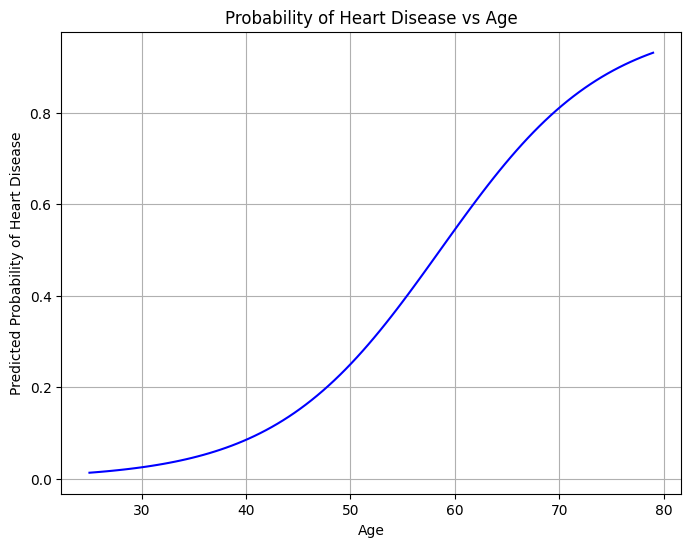

In [11]:
# Generate a range of ages to calculate probabilities
ages = np.linspace(df['Age'].min(), df['Age'].max(), 100)
X_new = sm.add_constant(ages)

# Get predicted probabilities for different ages
predicted_probabilities = result.predict(X_new)

# Plot the predicted probabilities
plt.figure(figsize=(8, 6))
plt.plot(ages, predicted_probabilities, color='blue')
plt.xlabel('Age')
plt.ylabel('Predicted Probability of Heart Disease')
plt.title('Probability of Heart Disease vs Age')
plt.grid(True)
plt.show()


### Just by looking the graph, that it's seems like there isn't a turning point, meaning the increase in the chance to get a heart disease is pretty steady.

## Now, since our feature is age, we can do survival analysis using lifelines.

In [12]:
import pandas as pd

# Assuming your dataset is in a DataFrame called 'df'
# 'age' column contains patient ages
# 'heart_disease' column: 1 means the patient has heart disease (death), 0 means no heart disease (alive/censored)

# Prepare the dataset for survival analysis
df['event'] = df['Heart Disease']  # 1 for death, 0 for censored (no heart disease)
df['duration'] = df['Age']  # Age as the duration/time variable

# Display first few rows to check the data preparation
print(df.head())


   Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
0   75  Female          228             119          66  Current   
1   48    Male          204             165          62  Current   
2   53    Male          234              91          67    Never   
3   69  Female          192              90          72  Current   
4   62  Female          172             163          93    Never   

  Alcohol Intake  Exercise Hours Family History Diabetes Obesity  \
0          Heavy               1             No       No     Yes   
1        Nothing               5             No       No      No   
2          Heavy               3            Yes       No     Yes   
3        Nothing               4             No      Yes      No   
4        Nothing               6             No      Yes      No   

   Stress Level  Blood Sugar Exercise Induced Angina   Chest Pain Type  \
0             8          119                     Yes   Atypical Angina   
1             9           70      

### Let's find a survival curve using Kaplan Meier Fitter.

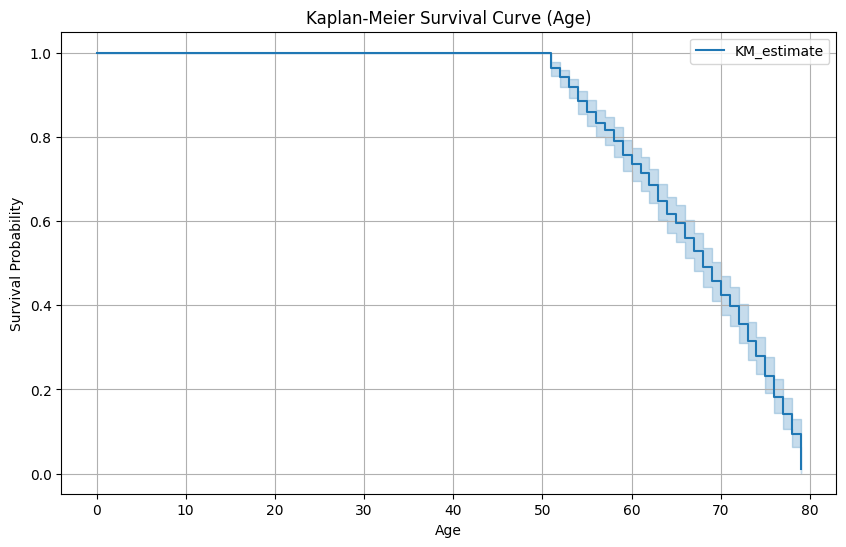

In [13]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Kaplan-Meier survival analysis
kmf = KaplanMeierFitter()

# Fit the Kaplan-Meier estimator using 'duration' and 'event'
kmf.fit(df['duration'], event_observed=df['event'])

# Plot the Kaplan-Meier survival curve
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve (Age)')
plt.xlabel('Age')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()


In [14]:
from lifelines import CoxPHFitter

# Cox Proportional Hazards Model (with 'age' as the primary feature)
cph = CoxPHFitter()

# Fit the model using 'duration' as the time variable and 'event' for death (heart disease)
cph.fit(df[['duration', 'event', 'Age']], duration_col='duration', event_col='event')

# Print the summary of the Cox model
cph.print_summary()  # Shows coefficients, p-values, hazard ratios


/home/yair/.local/lib/python3.10/site-packages/lifelines/utils/__init__.py:1163: ConvergenceWarning: Column Age has high sample correlation with the duration column. This may harm convergence. This could be a form of 'complete separation'.     See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/home/yair/.local/lib/python3.10/site-packages/lifelines/fitters/coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


<lifelines.CoxPHFitter: fitted with 1000 total observations, 608 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 392
   partial log-likelihood = -1461.56
         time fit was run = 2024-09-13 09:34:42 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
Age       -0.42      0.66      0.02           -0.47           -0.37                0.63                0.69

           cmp to      z      p  -log2(p)
covariate                                
Age          0.00 -17.15 <0.005    216.57
---
Concordance = 0.99
Partial AIC = 2925.12
log-likelihood ratio test = 1229.75 on 1 df
-log2(p) of ll-ratio test = 892.54

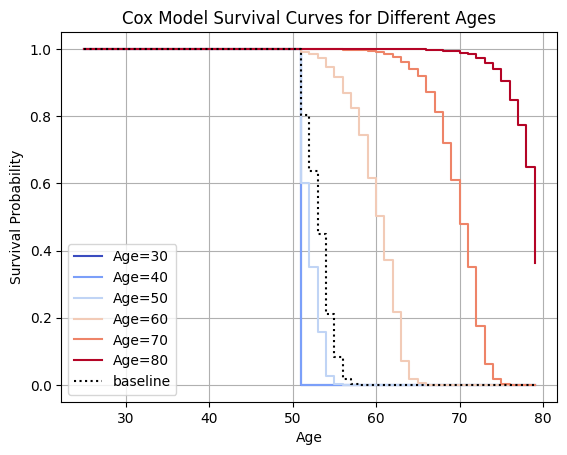

In [15]:
# Plot the Cox model's survival curve based on age
cph.plot_partial_effects_on_outcome(covariates='Age', values=[30, 40, 50, 60, 70, 80], cmap='coolwarm')
plt.title('Cox Model Survival Curves for Different Ages')
plt.xlabel('Age')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()


### This graph shows your chances of not getting a heart disease based on the age you start from. we can see that just like we saw on a the test earlier, its seems there isn't a big differende between where is your starting point, as long that it's above 50.

## Since we got such a weird result, I diceded to take another data set which contain data on heart disease, and has a feature named "age".my goal Is to check if that was drieved from not iid patient list that my original dataset used.

In [21]:
new_df = pd.read_csv("/home/yair/Downloads/heart_statlog_cleveland_hungary_final.csv")
new_df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


### Let's run proportion z test again

In [23]:
# Define the new age groups
group_50_65 = new_df[(new_df['age'] >= 50) & (new_df['age'] < 65)]
group_65_80 = new_df[(new_df['age'] >= 65) & (new_df['age'] < 80)]

# Heart disease counts in each group
count_50_65 = group_50_65['target'].value_counts()
count_65_80 = group_65_80['target'].value_counts()

print("50-65 years old:", count_50_65)
print("65-80 years old:", count_65_80)

50-65 years old: target
1    405
0    273
Name: count, dtype: int64
65-80 years old: target
1    90
0    51
Name: count, dtype: int64


In [24]:
# Get the number of heart disease cases and total observations in both groups
heart_disease_50_65 = count_50_65.get(1, 0)  # Cases of heart disease (1)
n1 = group_50_65.shape[0]  # Total number of people in the 50-65 group

heart_disease_65_80 = count_65_80.get(1, 0)  # Cases of heart disease (1)
n2 = group_65_80.shape[0]  # Total number of people in the 65-80 group

# Perform two-proportion z-test
count = np.array([heart_disease_50_65, heart_disease_65_80])
nobs = np.array([n1, n2])
stat, pval = proportions_ztest(count, nobs)

print(f"Two-proportion z-test statistic: {stat}, p-value: {pval}")


Two-proportion z-test statistic: -0.9048450386193224, p-value: 0.3655474875347712


### And again, we got a high p-value meaning we don't reject H_0, and any difference between the groups is proabably coincedence.

# This bring us to our first result, which is that from age 50 till 70, you have the same chance of dying from a heart disease every moment, and it's not risin or slowin down in any meaningful mannner. 

# Moreover, Being below 50 pretty much mean that you have close to zero chance of having a heart disease.